# Scikit-learn (sklearn)

In [1]:
# !pip install scikit-learn pandas matplotlib seaborn joblib

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures   

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import joblib


In [2]:
def plot_correlation_matrix(housing_df):
    """
    Display a correlation heatmap for the California Housing dataset features only (excluding target).
    
    Args:
        housing_df: The California Housing dataset.
    
    Returns:
        None
    """
    # Convert to DataFrame for easier plotting
    df = pd.DataFrame(housing_df.data, columns=housing_df.feature_names)
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Matrix: California Housing Features')
    plt.show()


(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


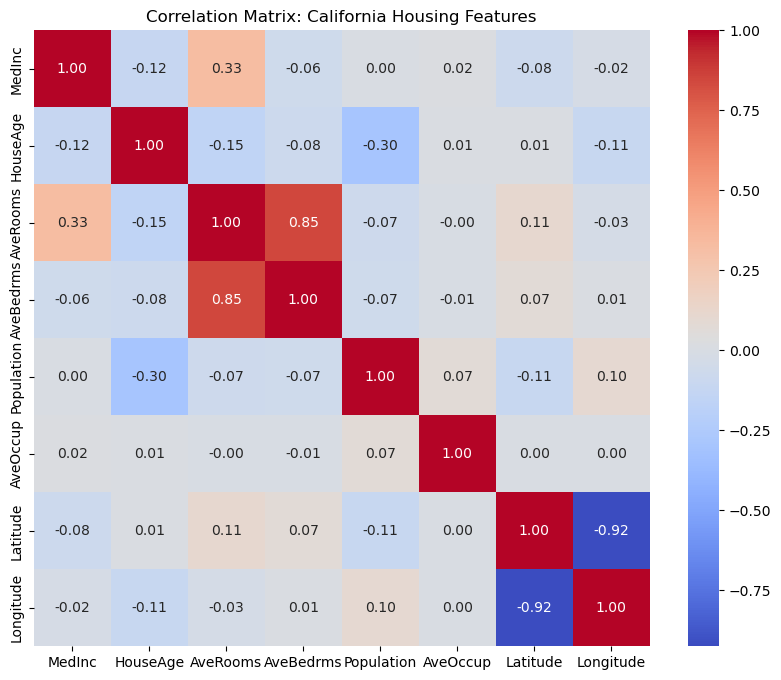

In [3]:
# Load the California Housing dataset
housing_df = datasets.fetch_california_housing()
print(housing_df.data.shape)
print(housing_df.feature_names)

# Show correlation plot
plot_correlation_matrix(housing_df)


<hr />

In [4]:
def set_features_and_target_variables(housing_df):
    """
    Separate features and target variable from the dataset.
    
    Args:
        housing_df: The California Housing dataset.

    Returns:
        X: Features
        y: Target variable
    """
    # Separate features and target
    X = housing_df.data
    y = housing_df.target

    print(X[0])

    print()

    print(f"y: {y.shape}")
    print(y[0])
    actual_price = y[0] * 100_000
    print(f"The mean home price (target) is ${actual_price:,.0f}")

    return X, y


In [5]:
def split_data(X, y):
    """
    Split the data into training and testing sets.

    Args:
        X (array-like): Features.
        y (array-like): Target variable.
    
    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state ensures reproducibility

    print(f"X_train: {X_train.shape}")
    print(f"X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test


In [6]:
def train_model(X_train, y_train):
    """
    Train a Linear Regression model.

    Args:
        X_train (array-like): Training features.
        y_train (array-like): Training target variable.
    
    Returns:
        model: Trained Linear Regression model.
    """

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train) # fit means train the model
    return model


In [7]:
def predict(model, X_test):
    """
    Make predictions using the trained model.

    Args:
        model: Trained Linear Regression model.
        X_test (array-like): Test features.
    
    Returns:
        y_pred: Predicted target variable.
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    return y_pred


In [8]:
def evaluate_model(y_test, y_pred):
    """
    Evaluate the model using R2 score.
    R2 Score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

    Args:
        y_test (array-like): True target values.
        y_pred (array-like): Predicted target values.
    
    Returns:
        r2: R2 score of the model.
    """
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2 * 100:.2f}%")
    return r2


<hr />

In [9]:
# Train and Evaluate Baseline Linear Regression Model performance

# Separate features and target
X, y = set_features_and_target_variables(housing_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y)

# Train the Linear Regression model
model = train_model(X_train, y_train)

# Make predictions on the test set
y_pred = predict(model, X_test)

# Evaluate the model
print()
baseline_r2_score = evaluate_model(y_test, y_pred)


[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

y: (20640,)
4.526
The mean home price (target) is $452,600
X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)

R2 Score: 57.58%


<hr />

In [10]:
# Create polynomial features for a more complex model
print(X.shape)

X, y = set_features_and_target_variables(housing_df)
poly = PolynomialFeatures()
X = poly.fit_transform(X)
print(X.shape)


(20640, 8)
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

y: (20640,)
4.526
The mean home price (target) is $452,600
(20640, 45)


In [11]:
# Train and Evaluate Model performance with Polynomial Features

X_train, X_test, y_train, y_test = split_data(X, y)

model = train_model(X_train, y_train)

print()
y_pred = predict(model, X_test)
poly_r2_score = evaluate_model(y_test, y_pred)

print()
improvement = poly_r2_score - baseline_r2_score
print(f"Improvement over Baseline ({baseline_r2_score}) R2 Score: {improvement * 100:.2f}%")


X_train: (16512, 45)
X_test: (4128, 45)
y_train: (16512,)
y_test: (4128,)

R2 Score: 64.57%

Improvement over Baseline (0.5757877060324524) R2 Score: 6.99%


<hr />

In [12]:
def train_model_v2(model, X_train, y_train):
    """
    Train a model.

    Args:
        model (object): The model to train.
        X_train (array-like): Training features.
        y_train (array-like): Training target variable.
    
    Returns:
        model: Trained model.
    """

    # Train Model   
    model.fit(X_train, y_train)
    return model


In [13]:
# Gradient Boosting Regressor
X, y = set_features_and_target_variables(housing_df)
X_train, X_test, y_train, y_test = split_data(X, y)
model = train_model_v2(GradientBoostingRegressor(), X_train, y_train)

print()
y_pred = predict(model, X_test)
gradient_boosting_r2_score = evaluate_model(y_test, y_pred)

print()
improvement = gradient_boosting_r2_score - poly_r2_score
print(f"Improvement over Polynomial ({poly_r2_score}) R2 Score: {improvement * 100:.2f}%")


[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

y: (20640,)
4.526
The mean home price (target) is $452,600
X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)

R2 Score: 77.56%

Improvement over Polynomial (0.6456819832921057) R2 Score: 13.00%


In [14]:
# Random Forest Regressor
X, y = set_features_and_target_variables(housing_df)
X_train, X_test, y_train, y_test = split_data(X, y)
model = train_model_v2(RandomForestRegressor(n_jobs=-1), X_train, y_train) # n_jobs=-1 uses all available CPU cores (faster)

print()
y_pred = predict(model, X_test)
random_forest_r2_score = evaluate_model(y_test, y_pred)

print()
improvement = random_forest_r2_score - gradient_boosting_r2_score
print(f"Improvement over Gradient Boosting ({gradient_boosting_r2_score}) R2 Score: {improvement * 100:.2f}%")


[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

y: (20640,)
4.526
The mean home price (target) is $452,600
X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)

R2 Score: 80.57%

Improvement over Gradient Boosting (0.7756446042829698) R2 Score: 3.01%


<hr />

In [15]:
# Export trained Random Forest model
joblib.dump(model, 'ca_housing_price_predictor_model.joblib')


['ca_housing_price_predictor_model.joblib']

In [16]:
# Load the model from the file
ca_housing_price_predictor_model = joblib.load('ca_housing_price_predictor_model.joblib')

y_pred = predict(ca_housing_price_predictor_model, X_test)
random_forest_r2_score = evaluate_model(y_test, y_pred)


R2 Score: 80.57%
